In [77]:
import numpy as np
import random
import tqdm
from read import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
trainData   = np.array(list(read('training','images')))
trainLabels = np.array(list(read('training','labels')))
testData    = np.array(list(read('testing','images')))
testLabels  = np.array(list(read('testing','labels')))
trainData   = np.reshape(trainData, (trainData.shape[0], -1))
testData    = np.reshape(testData, (testData.shape[0], -1))

labelIdx = list(enumerate(trainLabels))
unique_label = list(set(trainLabels))

In [39]:
def pca(trainData, testData, components):
    
    testData = np.reshape(testData, (testData.shape[0], -1))
    
    trainData = trainData - np.expand_dims(np.mean(trainData, axis=1), axis=1)
    covariance = np.cov(trainData.T)
    U, S, V = np.linalg.svd(covariance)
    eigenvectors = U[:, :components]
    trainData = np.dot(trainData, eigenvectors)
    testData = np.dot(testData, eigenvectors)
    
    return trainData, testData

In [3]:
def random_selection(trainData, trainLabels, M):
    
    idxs = list(np.random.choice(trainData.shape[0], M, replace=False))
    reduced_train = trainData[idxs]
    reduced_label = trainLabels[idxs]
    
    return reduced_train, reduced_label

In [26]:
def prototype_selection(trainData, trainLabels, M, components):
    
    reduced_train = []
    reduced_lebel = []
    
    each_label_num = int(M/10)
    
    # for every label in 0-9
    for label in unique_label:
        
        # list of index of 0-9 in trainData/trainLabels
        idx = [i for i, v in labelIdx if v == label]
        
        trains = trainData[idx]
        labels = trainLabels[idx]
        
        model = KMeans(n_clusters = each_label_num)
        model.fit(trains)
        prototype = model.cluster_centers_
        
        reduced_train.append(prototype)
        reduced_lebel.append(labels[:each_label_num])
    
    reduced_train = np.array(reduced_train).ravel().reshape(-1,components)
    reduced_lebel = np.array(reduced_lebel).ravel()
    return reduced_train, reduced_lebel

In [ ]:
# ---------------------- no pca ---------------------------------#

In [7]:
M = 100
reduced_train, reduced_label = prototype_selection(trainData, trainLabels, M)
random_reduced_train, random_reduced_label = random_selection(trainData, trainLabels, M)
# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 92.52%


In [8]:
# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 73.11%


In [10]:
M = 500
reduced_train, reduced_label = prototype_selection(trainData, trainLabels, M)
random_reduced_train, random_reduced_label = random_selection(trainData, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 95.08%
Accuracy: 85.21%


In [12]:
M = 1000
reduced_train, reduced_label = prototype_selection(trainData, trainLabels, M)
random_reduced_train, random_reduced_label = random_selection(trainData, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 95.94%
Accuracy: 89.14%


In [14]:
M = 5000
reduced_train, reduced_label = prototype_selection(trainData, trainLabels, M)
random_reduced_train, random_reduced_label = random_selection(trainData, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 96.69%
Accuracy: 93.2%


In [19]:
M = 10000
reduced_train, reduced_label = prototype_selection(trainData, trainLabels, M)
random_reduced_train, random_reduced_label = random_selection(trainData, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(testData)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 97.04%
Accuracy: 94.78999999999999%


In [ ]:
# -------------------------------- pca -------------------------------------------- #

In [42]:
M = 100
components = 25
train_pca, test_pca = pca(trainData, testData, components)
reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 92.24%
Accuracy: 76.01%


In [43]:
M = 500
components = 25
train_pca, test_pca = pca(trainData, testData, components)
reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 94.83%
Accuracy: 86.57000000000001%


In [44]:
M = 1000
components = 25
train_pca, test_pca = pca(trainData, testData, components)
reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 95.71%
Accuracy: 89.86%


In [45]:
M = 5000
components = 25
train_pca, test_pca = pca(trainData, testData, components)
reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 96.69%
Accuracy: 94.19999999999999%


In [46]:
M = 10000
components = 25
train_pca, test_pca = pca(trainData, testData, components)
reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

# training data reduced by euclidean distance
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(reduced_train, reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

# training data reduced by random
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(random_reduced_train, random_reduced_label)
result = knn.predict(test_pca)
print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

Accuracy: 96.61999999999999%
Accuracy: 95.6%


In [ ]:
# ------------------------------------ pca many time ------------------------------------ #

In [53]:
kmean_acc_100, random_acc_100 = [], []
for i in tqdm.tqdm(range(10)):
    M = 100
    components = 25
    train_pca, test_pca = pca(trainData, testData, components)
    reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
    random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

    # training data reduced by euclidean distance
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_train, reduced_label)
    result = knn.predict(test_pca)
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')
    kmean_acc_100.append(np.sum(result==testLabels)/result.shape[0])
    
    # training data reduced by random
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(random_reduced_train, random_reduced_label)
    result = knn.predict(test_pca)
    random_acc_100.append(np.sum(result==testLabels)/result.shape[0])
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

 10%|█         | 1/10 [00:06<00:55,  6.12s/it]

Accuracy: 92.17999999999999%
Accuracy: 74.67%


 20%|██        | 2/10 [00:12<00:49,  6.15s/it]

Accuracy: 92.33%
Accuracy: 74.05000000000001%


 30%|███       | 3/10 [00:18<00:42,  6.04s/it]

Accuracy: 92.0%
Accuracy: 72.58%


 40%|████      | 4/10 [00:24<00:37,  6.20s/it]

Accuracy: 92.17%
Accuracy: 73.34%


 50%|█████     | 5/10 [00:30<00:30,  6.18s/it]

Accuracy: 92.21000000000001%
Accuracy: 75.32%


 60%|██████    | 6/10 [00:37<00:24,  6.19s/it]

Accuracy: 92.06%
Accuracy: 73.81%


 70%|███████   | 7/10 [00:43<00:18,  6.21s/it]

Accuracy: 92.15%
Accuracy: 69.73%


 80%|████████  | 8/10 [00:49<00:12,  6.14s/it]

Accuracy: 92.25999999999999%
Accuracy: 72.5%


 90%|█████████ | 9/10 [00:55<00:06,  6.21s/it]

Accuracy: 92.12%
Accuracy: 76.21%


100%|██████████| 10/10 [01:01<00:00,  6.20s/it]

Accuracy: 92.44%
Accuracy: 76.06%


In [56]:
kmean_acc_500, random_acc_500 = [], []
for i in tqdm.tqdm(range(10)):
    M = 500
    components = 25
    train_pca, test_pca = pca(trainData, testData, components)
    reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
    random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

    # training data reduced by euclidean distance
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_train, reduced_label)
    result = knn.predict(test_pca)
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')
    kmean_acc_500.append(np.sum(result==testLabels)/result.shape[0])
    
    # training data reduced by random
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(random_reduced_train, random_reduced_label)
    result = knn.predict(test_pca)
    random_acc_500.append(np.sum(result==testLabels)/result.shape[0])
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

 10%|█         | 1/10 [00:17<02:34, 17.21s/it]

Accuracy: 95.17%
Accuracy: 87.1%


 20%|██        | 2/10 [00:34<02:17, 17.20s/it]

Accuracy: 94.93%
Accuracy: 87.42999999999999%


 30%|███       | 3/10 [00:51<01:59, 17.10s/it]

Accuracy: 95.00999999999999%
Accuracy: 87.4%


 40%|████      | 4/10 [01:09<01:44, 17.39s/it]

Accuracy: 94.77%
Accuracy: 87.31%


 50%|█████     | 5/10 [01:26<01:27, 17.40s/it]

Accuracy: 94.81%
Accuracy: 86.92%


 60%|██████    | 6/10 [01:44<01:10, 17.61s/it]

Accuracy: 95.07%
Accuracy: 87.19%


 70%|███████   | 7/10 [02:02<00:52, 17.61s/it]

Accuracy: 94.94%
Accuracy: 86.75%


 80%|████████  | 8/10 [02:19<00:35, 17.59s/it]

Accuracy: 95.04%
Accuracy: 87.96000000000001%


 90%|█████████ | 9/10 [02:37<00:17, 17.64s/it]

Accuracy: 94.95%
Accuracy: 88.17%


100%|██████████| 10/10 [02:55<00:00, 17.71s/it]

Accuracy: 95.04%
Accuracy: 87.29%


In [58]:
kmean_acc_1000, random_acc_1000 = [], []
for i in tqdm.tqdm(range(10)):
    M = 1000
    components = 25
    train_pca, test_pca = pca(trainData, testData, components)
    reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
    random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

    # training data reduced by euclidean distance
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_train, reduced_label)
    result = knn.predict(test_pca)
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')
    kmean_acc_1000.append(np.sum(result==testLabels)/result.shape[0])
    
    # training data reduced by random
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(random_reduced_train, random_reduced_label)
    result = knn.predict(test_pca)
    random_acc_1000.append(np.sum(result==testLabels)/result.shape[0])
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 95.64%


 10%|█         | 1/10 [00:25<03:51, 25.75s/it]

Accuracy: 90.55%
Accuracy: 95.75%


 20%|██        | 2/10 [00:50<03:23, 25.49s/it]

Accuracy: 90.59%
Accuracy: 95.67%


 30%|███       | 3/10 [01:15<02:56, 25.26s/it]

Accuracy: 90.48%
Accuracy: 95.57%


 40%|████      | 4/10 [01:40<02:30, 25.08s/it]

Accuracy: 90.39%
Accuracy: 95.67999999999999%


 50%|█████     | 5/10 [02:05<02:05, 25.18s/it]

Accuracy: 89.75999999999999%
Accuracy: 95.6%


 60%|██████    | 6/10 [02:31<01:41, 25.31s/it]

Accuracy: 90.47%
Accuracy: 95.75%


 70%|███████   | 7/10 [02:55<01:15, 25.14s/it]

Accuracy: 90.42999999999999%
Accuracy: 95.67999999999999%


 80%|████████  | 8/10 [03:20<00:50, 25.14s/it]

Accuracy: 90.71000000000001%
Accuracy: 95.76%


 90%|█████████ | 9/10 [03:46<00:25, 25.20s/it]

Accuracy: 90.16%
Accuracy: 95.84%


100%|██████████| 10/10 [04:12<00:00, 25.50s/it]

Accuracy: 90.48%


In [61]:
kmean_acc_5000, random_acc_5000 = [], []
for i in tqdm.tqdm(range(10)):
    M = 5000
    components = 25
    train_pca, test_pca = pca(trainData, testData, components)
    reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
    random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

    # training data reduced by euclidean distance
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_train, reduced_label)
    result = knn.predict(test_pca)
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')
    kmean_acc_5000.append(np.sum(result==testLabels)/result.shape[0])
    
    # training data reduced by random
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(random_reduced_train, random_reduced_label)
    result = knn.predict(test_pca)
    random_acc_5000.append(np.sum(result==testLabels)/result.shape[0])
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 96.56%


 10%|█         | 1/10 [01:18<11:50, 78.98s/it]

Accuracy: 94.53%
Accuracy: 96.27%


 20%|██        | 2/10 [02:38<10:34, 79.29s/it]

Accuracy: 94.42%
Accuracy: 96.65%


 30%|███       | 3/10 [03:55<09:09, 78.57s/it]

Accuracy: 94.25%
Accuracy: 96.55%


 40%|████      | 4/10 [05:13<07:49, 78.33s/it]

Accuracy: 94.37%
Accuracy: 96.85000000000001%


 50%|█████     | 5/10 [06:33<06:33, 78.77s/it]

Accuracy: 94.42%
Accuracy: 96.59%


 60%|██████    | 6/10 [07:50<05:12, 78.17s/it]

Accuracy: 94.06%
Accuracy: 96.54%


 70%|███████   | 7/10 [09:07<03:53, 77.91s/it]

Accuracy: 94.53%
Accuracy: 96.61999999999999%


 80%|████████  | 8/10 [10:24<02:35, 77.76s/it]

Accuracy: 94.45%
Accuracy: 96.6%


 90%|█████████ | 9/10 [11:42<01:17, 77.63s/it]

Accuracy: 94.28%
Accuracy: 96.69%


100%|██████████| 10/10 [12:59<00:00, 77.41s/it]

Accuracy: 94.36%


In [64]:
kmean_acc_10000, random_acc_10000 = [], []
for i in tqdm.tqdm(range(10)):
    M = 10000
    components = 25
    train_pca, test_pca = pca(trainData, testData, components)
    reduced_train, reduced_label = prototype_selection(train_pca, trainLabels, M, components)
    random_reduced_train, random_reduced_label = random_selection(train_pca, trainLabels, M)

    # training data reduced by euclidean distance
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(reduced_train, reduced_label)
    result = knn.predict(test_pca)
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')
    kmean_acc_10000.append(np.sum(result==testLabels)/result.shape[0])
    
    # training data reduced by random
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(random_reduced_train, random_reduced_label)
    result = knn.predict(test_pca)
    random_acc_10000.append(np.sum(result==testLabels)/result.shape[0])
    print("Accuracy: " + str(np.sum(result==testLabels)/result.shape[0]*100) + '%')

  0%|          | 0/10 [00:00<?, ?it/s]

Accuracy: 96.93%


 10%|█         | 1/10 [02:12<19:53, 132.65s/it]

Accuracy: 95.67999999999999%
Accuracy: 96.88%


 20%|██        | 2/10 [04:22<17:34, 131.81s/it]

Accuracy: 95.39999999999999%
Accuracy: 96.91%


 30%|███       | 3/10 [06:33<15:21, 131.58s/it]

Accuracy: 95.47%
Accuracy: 96.83%


 40%|████      | 4/10 [08:44<13:08, 131.49s/it]

Accuracy: 95.65%
Accuracy: 96.64%


 50%|█████     | 5/10 [10:55<10:56, 131.39s/it]

Accuracy: 95.58%
Accuracy: 96.89%


 60%|██████    | 6/10 [13:08<08:46, 131.60s/it]

Accuracy: 95.46%
Accuracy: 96.65%


 70%|███████   | 7/10 [15:19<06:34, 131.62s/it]

Accuracy: 95.84%
Accuracy: 96.81%


 80%|████████  | 8/10 [17:31<04:23, 131.72s/it]

Accuracy: 95.52000000000001%
Accuracy: 96.71%


 90%|█████████ | 9/10 [19:44<02:12, 132.15s/it]

Accuracy: 95.39999999999999%
Accuracy: 96.89%


100%|██████████| 10/10 [22:07<00:00, 135.31s/it]

Accuracy: 95.81%


In [68]:
mean_100, std_100 = np.mean(kmean_acc_100), np.std(kmean_acc_100)
mean_500, std_500 = np.mean(kmean_acc_500), np.std(kmean_acc_500)
mean_1000, std_1000 = np.mean(kmean_acc_1000), np.std(kmean_acc_1000)
mean_5000, std_5000 = np.mean(kmean_acc_5000), np.std(kmean_acc_5000)
mean_10000, std_10000 = np.mean(kmean_acc_10000), np.std(kmean_acc_10000)

In [71]:
random_mean_100, random_std_100 = np.mean(random_acc_100), np.std(random_acc_100)
random_mean_500, random_std_500 = np.mean(random_acc_500), np.std(random_acc_500)
random_mean_1000, random_std_1000 = np.mean(random_acc_1000), np.std(random_acc_1000)
random_mean_5000, random_std_5000 = np.mean(random_acc_5000), np.std(random_acc_5000)
random_mean_10000, random_std_10000 = np.mean(random_acc_10000), np.std(random_acc_10000)

In [237]:
1.96*random_std_10000/np.sqrt(5)

0.0013301744727666413

In [215]:
random_conf_interval

[0.05607584192552245,
 0.012509023766924808,
 0.007697675903348745,
 0.0040942164076257954,
 0.004615484045930322]

In [85]:
idx = np.arange(5)
width = 0.35
dof = 4
alpha = 1.0 - 0.95
conf_interval = t.ppf(1-alpha/2., dof) * np.sqrt(1.+1./5)
proto_conf_interval = [conf_interval*i for i in proto_std]
random_conf_interval = [conf_interval*i for i in random_std]

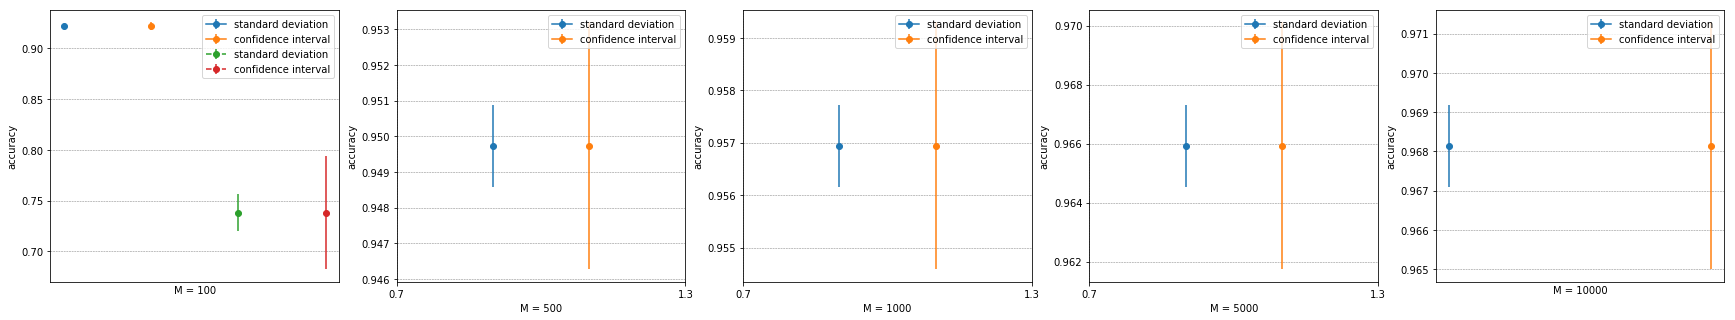

In [184]:
fig = plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
plt.errorbar(0.85, mean_100, yerr=std_100, fmt='-o', label='standard deviation')
plt.errorbar(0.95, mean_100, yerr=proto_conf_interval[0], fmt='-o', label='confidence interval')
plt.errorbar(1.05, random_mean_100, yerr=random_std_100, fmt='-o', label='standard deviation',linestyle='--')
plt.errorbar(1.15, random_mean_100, yerr=random_conf_interval[0], fmt='-o', label='confidence interval',linestyle='--')
plt.xticks([])
plt.xlabel('M = 100')
plt.ylabel('accuracy')
plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
plt.legend()

plt.subplot(1,5,2)
plt.errorbar(0.9, mean_500, yerr=std_500, fmt='-o', label='standard deviation')
plt.errorbar(1.1, mean_500, yerr=proto_conf_interval[1], fmt='-o', label='confidence interval')
plt.xticks([0.7,1.3])
plt.xlabel('M = 500')
plt.ylabel('accuracy')
plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
plt.legend()

plt.subplot(1,5,3)
plt.errorbar(0.9, mean_1000, yerr=std_1000, fmt='-o', label='standard deviation')
plt.errorbar(1.1, mean_1000, yerr=proto_conf_interval[2], fmt='-o', label='confidence interval')
plt.xticks([0.7,1.3])
plt.xlabel('M = 1000')
plt.ylabel('accuracy')
plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
plt.legend()

plt.subplot(1,5,4)
plt.errorbar(0.9, mean_5000, yerr=std_5000, fmt='-o', label='standard deviation')
plt.errorbar(1.1, mean_5000, yerr=proto_conf_interval[3], fmt='-o', label='confidence interval')
plt.xticks([0.7,1.3])
plt.xlabel('M = 5000')
plt.ylabel('accuracy')
plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
plt.legend()

plt.subplot(1,5,5)
plt.errorbar(0.9, mean_10000, yerr=std_10000, fmt='-o', label='standard deviation')
plt.errorbar(1.1, mean_10000, yerr=proto_conf_interval[4], fmt='-o', label='confidence interval')
plt.xticks([])
plt.xlabel('M = 10000')
plt.ylabel('accuracy')
plt.grid(True, linestyle = "--", color = "gray", linewidth = 0.5)
plt.legend()

plt.show()